In [5]:
# Use sys.exit between objectives to stop running.
import sys

# Objective 01 - Describe the Components of an Autoencoder
## Overview
An autoencoder is a type of neural network that learns, unsupervised, how to copy its input to the output. Autoencoders don't just make a copy but are restricted so that they have to learn an approximation of the input. Another way to think of an autoencoder is that it compresses the data in the input layer into a smaller, less complex representation. Then, it decodes that compressed representation to match the desired output better.

An autoencoder works in a way that is similar to principal component analysis (PCA), where the data is projected from a higher dimension to a lower dimension while preserving the critical features of the data but removing the noise.

Autoencoder
Below is a basic representation of an autoencoder. In this example, this autoencoder learns a "compressed" representation of the input images (MNIST digits). The encoder learns the compressed representation, and the decoder outputs the reconstructed input (image credit: https://blog.keras.io/building-autoencoders-in-keras.html) (Links to an external site.). 
https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-canvas-images/main/unit_4/autoencoder_schema.jpg

 

autoencoder

## Follow Along
A helpful exercise for this part of the module would be to review the Keras documentation available here. https://blog.keras.io/building-autoencoders-in-keras.html In the next part of this module, we'll follow this example to implement an autoencoder.

## Challenge
As a stretch goal, work ahead and follow the example above or look up another example. Even if your code doesn't run, try to predict how the output might look. For example, for images, how will the output compare to the input?

## Additional Resources
DeepAI: Autoencoder https://deepai.org/machine-learning-glossary-and-terms/autoencoder
Building Autoencoders in Keras https://blog.keras.io/building-autoencoders-in-keras.html

# Objective 02 - Train an Autoencoder
## Overview
We've already covered a little bit of how an autoencoder works. Now it's time to implement one in Kera. We'll use the classic MNIST digits dataset and let the autoencoder do its thing.

## Follow Along
In this example, inspired by the Keras blog, we'll train an autoencoder on the MNIST digits dataset.

In [17]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We'll separate the data into training and testing sets.

In [18]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [19]:
input_img= Input(shape=(784,))

In [20]:
# Create simple autoencoder

# The size of our encoded representations
# 32 floats -> compression of factor 24.5, assuming the input is 784 floats
encoding_dim = 32  

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = Model(input_img, encoded)

Let's look at the autoencoder summary (maps an input to its reconstruction).

In [22]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_8 (Dense)             (None, 32)                25120     
                                                                 
 dense_9 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


And also at the encoder model (maps input to encoded representation).

In [23]:
encoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_8 (Dense)             (None, 32)                25120     
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


Now we're ready to compile and fit the autoencoder

In [24]:
# Compile the model
autoencoder.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                workers=7,
                validation_data=(X_test, X_test))

Epoch 1/10
235/235 [==============================] - 3s 10ms/step - loss: 0.2701 - accuracy: 0.0120 - val_loss: 0.1902 - val_accuracy: 0.0111
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1712 - accuracy: 0.0108 - val_loss: 0.1536 - val_accuracy: 0.0105
Epoch 3/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1433 - accuracy: 0.0102 - val_loss: 0.1327 - val_accuracy: 0.0088
Epoch 4/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1275 - accuracy: 0.0100 - val_loss: 0.1206 - val_accuracy: 0.0086
Epoch 5/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1176 - accuracy: 0.0099 - val_loss: 0.1130 - val_accuracy: 0.0088
Epoch 6/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1109 - accuracy: 0.0100 - val_loss: 0.1071 - val_accuracy: 0.0091
Epoch 7/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1060 - accuracy: 0.0103 - val_loss: 0.1029 - val_accuracy: 0.0104
Epoch

In [25]:
# Make predictions with the test data
encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

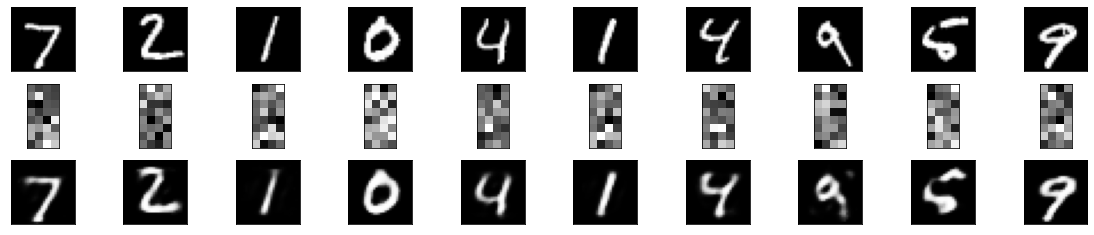

<Figure size 432x288 with 0 Axes>

In [26]:
# Plotting code from:
# https://medium.com/datadriveninvestor/deep-autoencoder-using-keras-b77cd3e8be95

# Plot the results
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded images
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


plt.show() # Uncomment to see the figure

# Clear the figure for proper Canvas formatting
plt.clf()

## Challenge
Add more layers! While the autoencoder seems to produce decent results, we could improve the performance by using more layers (a deeper network). Here is a suggested architecture to test out:

In [27]:
# Deeper autoencoder
encoded = Dense(units=128, activation='relu')(input_img)
encoded = Dense(units=64, activation='relu')(encoded)
encoded = Dense(units=32, activation='relu')(encoded)
decoded = Dense(units=64, activation='relu')(encoded)
decoded = Dense(units=128, activation='relu')(decoded)
decoded = Dense(units=784, activation='sigmoid')(decoded)

## Additional Resources
Deep Autoencoder using Keras https://medium.com/datadriveninvestor/deep-autoencoder-using-keras-b77cd3e8be95  
Keras blog: Building Autoencoders in Keras https://blog.keras.io/building-autoencoders-in-keras.html

In [28]:
sys.exit

<function sys.exit(status=None, /)>

# Objective 03 - Apply an Autoencoder to a Basic Information Retrieval Problem
## Overview
In the last objective, we trained an autoencoder on the MNIST digits. The next step is to provide the autoencoder with an image and then retrieve similar images.

## Follow Along
We need to repeat the steps from the previous module to have a trained autoencoder and then do the information retrieval process.